In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

print("Path to dataset files:", path)

/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/olga/.cache/kagglehub/datasets/kaushil268/disease-prediction-using-machine-learning/versions/1


In [2]:
import os

files = os.listdir(path)
print(files)

['Training.csv', 'Testing.csv']


In [3]:
training_path = os.path.join(path, 'Training.csv')
test_path = os.path.join(path, 'Testing.csv')

In [4]:
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

set_config(transform_output='pandas')

train_data = pd.read_csv(training_path)
test_data = pd.read_csv(test_path)



In [5]:
print(train_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [6]:
print(test_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

### EDA Train data

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
train_data['Unnamed: 133'].unique()

array([nan])

In [9]:
missing_values_train = train_data.isnull().sum()
missing_values_train

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [10]:
train_data['prognosis'].describe()

count                 4920
unique                  41
top       Fungal infection
freq                   120
Name: prognosis, dtype: object

In [11]:
column_list = train_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [12]:
duplicate_columns_train = train_data.columns[train_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_train.tolist()}')

Duplicate column names: []


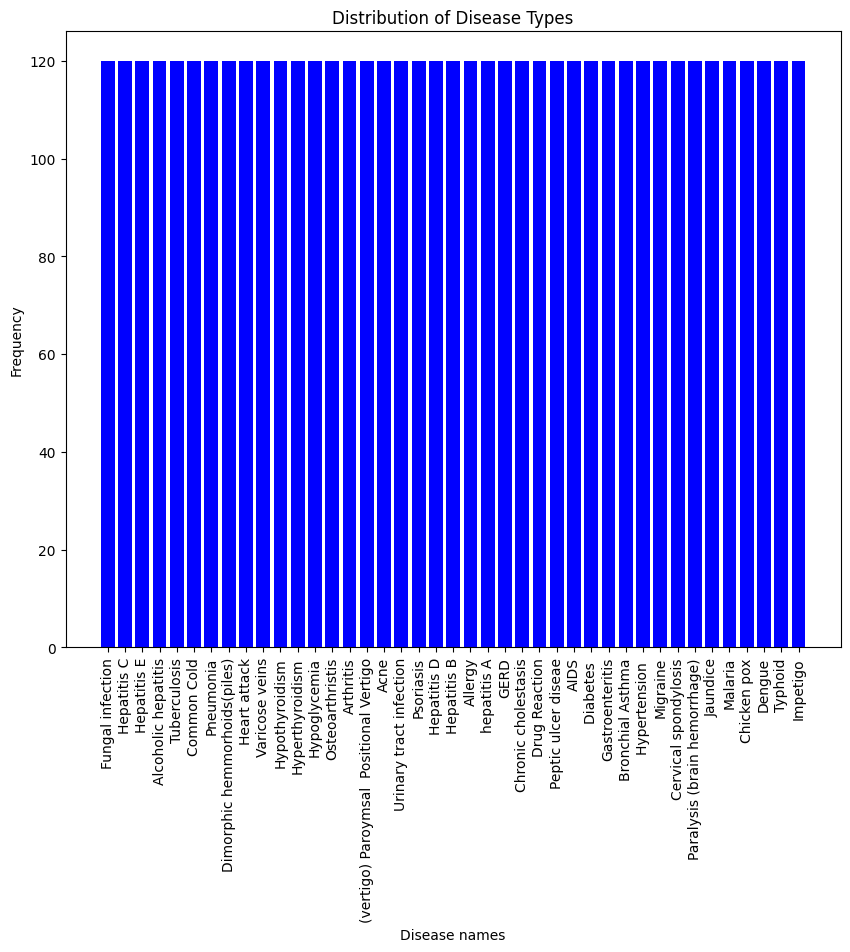

In [13]:
names = train_data['prognosis'].value_counts().keys()
counts = train_data['prognosis'].value_counts().values
plt.subplots(figsize=(10, 8))
plt.bar(names, counts, color='blue')

plt.xlabel('Disease names')
plt.ylabel('Frequency')
plt.title('Distribution of Disease Types')
plt.xticks(rotation=90)
plt.show()

- dataset is balanced, 120 samples

In [14]:
train_data.shape

(4920, 134)

Text(0.5, 1.0, 'Missing Data')

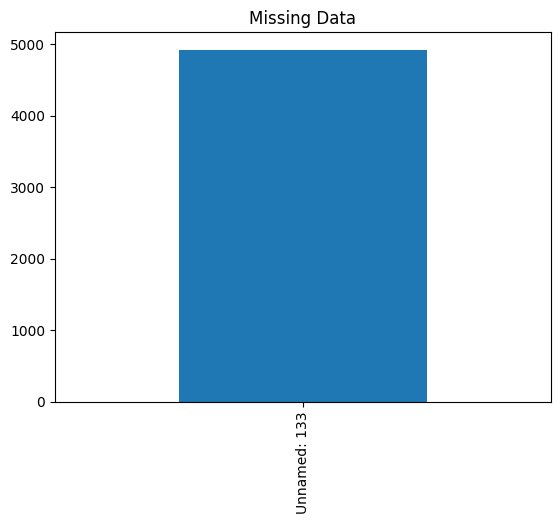

In [15]:
# to show the amount of missing data for each symptom
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing = missing.sort_values(ascending=False)
missing.plot.bar()
plt.title('Missing Data')

In [16]:
train_data.drop(columns=['Unnamed: 133'], inplace=True)

In [17]:
train_data.shape

(4920, 133)

### EDA Test data

In [18]:
test_data.shape

(42, 133)

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [20]:
column_list = test_data.columns.tolist()
column_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [21]:
duplicate_columns_test = test_data.columns[test_data.columns.duplicated()]
print(f'Duplicate column names: {duplicate_columns_test.tolist()}')

Duplicate column names: []


In [22]:
test_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [23]:
test_data['prognosis'].value_counts()

prognosis
Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1


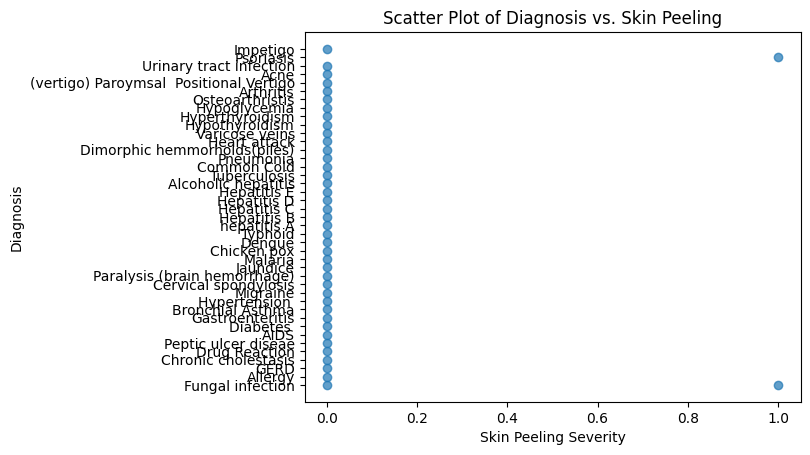

In [24]:
plt.scatter(test_data['skin_peeling'], test_data['prognosis'], alpha=0.7)

plt.xlabel('Skin Peeling Severity')
plt.ylabel('Diagnosis')
plt.title('Scatter Plot of Diagnosis vs. Skin Peeling')
plt.show()

In [25]:
df_test = pd.DataFrame(test_data)

avg_by_diagnosis = df_test.groupby('prognosis').mean()

avg_by_diagnosis.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge two datasets

In [26]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

In [27]:
full_data.shape

(4962, 133)

In [28]:
from sklearn.model_selection import train_test_split

X = full_data.drop(columns=['prognosis'])

y = full_data['prognosis']

y = y.astype('category')
y_encoded = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (3969, 132)
Testing set size: (993, 132)


In [ ]:
overlap = X_train.merge(X_test, how='inner')
print(f"Overlap rows: {len(overlap)}")

Overlap rows: 38514


In [35]:
print(f"Original dataset size: {full_data.shape}")
full_data_cleaned = full_data.drop_duplicates()
print(f"After dropping duplicates: {full_data_cleaned.shape}")


Original dataset size: (4962, 133)
After dropping duplicates: (305, 133)


- 132 binary symptom columns (0 or 1)
- 1 target column: 'prognosis' with 42 disease labels
- 4,962 rows, but only 305 unique combinations

In [40]:
from sklearn.model_selection import train_test_split

X_ = full_data_cleaned.drop(columns=['prognosis'])

y_ = full_data_cleaned['prognosis']

y_ = y_.astype('category')
y_encoded_ = y_.cat.codes

X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X_, y_encoded_, test_size=0.2, random_state=42, stratify=y_encoded_
)
print(f'Training set size: {X_train_.shape}')
print(f'Testing set size: {X_test_.shape}')

Training set size: (244, 132)
Testing set size: (61, 132)


## Probability ML algorithm - Bernoulli Naive Bayes

calculates the probability of each class (disease) given the input features (symptoms). It assumes that each feature follows a normal (Gaussian) distribution within each class.

Negative sides:
- feature mismatch, as we have binary symptom indicators. Assumption - follows a normal distribution
- 42 diseases, struggles to estimate probabilities

- If we ues the full_data with duplicates, the model will memorize not generalize. We have like 38k overlapping rows before duplication. Each disease is represented by a fixed set of symptoms and repeated many times. So when we train a model it can memorize the exact symptom patterns and predict perfectly.

- This model is fast, simple, and interpretable. It worked well on our dataset because the symptoms are binary, and the disease patterns are consistent. However, since the dataset is synthetic and contains many repeated rows, the model achieved very high accuracy — which may not reflect real-world performance.

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import BernoulliNB, GaussianNB

# Init the Bernoulli Classifier
model = BernoulliNB()  

# Train the model
model.fit(X_train_, y_train_)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [42]:
# Predict Output
pred_ = model.predict(X_test_)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_, pred_))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.50      1.00      0.67         1
          17       1.00    

/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/olga/DSI

/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/olga/DSI

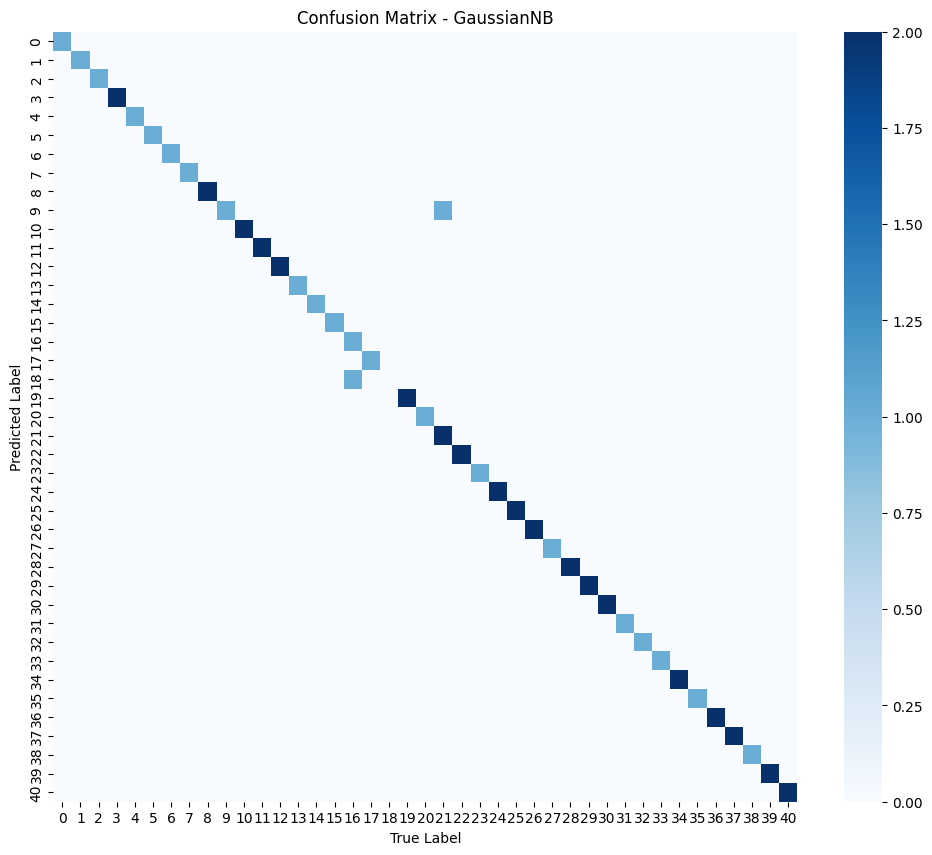

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat_ = confusion_matrix(y_test_, pred_)
labels_ = np.unique(y_test_)

plt.figure(figsize=(12, 10))
sns.heatmap(mat_, annot=False, fmt='d', cmap='Blues',
            xticklabels=labels_, yticklabels=labels_)

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix - GaussianNB')
plt.show()


In [46]:
from sklearn.metrics import accuracy_score

accuracy_ = accuracy_score(y_test_, pred_)
print(f"Accuracy: {accuracy_:.2f}")


Accuracy: 0.97


/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/olga/DSI/DiseaseFeatureClassifiers/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
